## Observations 

Initial research question was to figure out how global warming has progressed over time. We intended to find evidence of climate change over the dataset. However, as we have conducted some initial EDAs, we concluded that a data analysis on climate change will be difficult given the limited time span of data(10 years of data). A example of a EDA trying to show the difference in temperature change over the past 10 years are plotted below. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [22]:
df = pd.read_csv('/Users/takumi/Documents/DATA301_1023/course-project-group_1023/data/raw/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


### First conduct some EDAs to get fimilar with the dataset 

In [23]:
### Dropping columns evaporation and sunshine beucase 40% are NA values. 

df2= df.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm','RainToday','RainTomorrow'])

df2

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1
145458,2017-06-24,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0


In [24]:
### changing column name rainfall to percipitation 
df3 = df2.rename(columns={'Rainfall':"Percipitation"})

df3

,Date,Location,MinTemp,MaxTemp,Percipitation,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1
145458,2017-06-24,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0


In [25]:
df4 = df3.dropna()
df4

,Date,Location,MinTemp,MaxTemp,Percipitation,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1


In [26]:
df5 = df4.reset_index(drop=True)

df5

,Date,Location,MinTemp,MaxTemp,Percipitation,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113674,2017-06-20,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9
113675,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4
113676,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5
113677,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1


## How wind flows through Australia

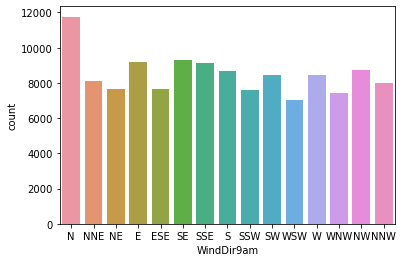

In [27]:
### plotting frequency in wind direction observed at 9am 
plot_wind_count9am = sns.countplot(data=df,
                                   x= 'WindDir9am',
                                   order = ['N',"NNE","NE","E","ESE","SE","SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"])

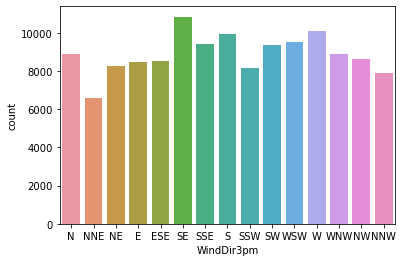

In [29]:
### plotting frequency in wind direction observed at 3pm 
plot_wind_count_3pm = sns.countplot(data=df,
                                    x='WindDir3pm',
                                    order = ['N',"NNE","NE","E","ESE","SE","SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"])

#### we can see that there is not much difference in the wind direction across Australia as a whole. 

---

## Looking into one specific city and visualising data
The selected city is Sydney 

In [30]:
### subsetting city of Sydney

sydney = df[df["Location"]=='Sydney']
sydney.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes
30181,2008-02-06,Sydney,20.2,27.2,1.6,2.6,8.6,NaN,NaN,W,...,69.0,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,Yes,Yes
30182,2008-02-07,Sydney,18.6,26.3,6.2,5.2,5.2,NaN,NaN,W,...,75.0,80.0,999.0,1000.3,4.0,7.0,21.7,22.3,Yes,Yes
30183,2008-02-08,Sydney,17.2,22.3,27.6,5.8,2.1,NaN,NaN,S,...,77.0,61.0,1008.3,1007.4,7.0,8.0,18.9,21.1,Yes,Yes
30184,2008-02-09,Sydney,16.4,20.8,12.6,4.8,3.0,NaN,NaN,SSW,...,92.0,91.0,1006.4,1007.6,7.0,7.0,17.1,16.5,Yes,Yes
30185,2008-02-10,Sydney,14.6,24.2,8.8,4.4,10.1,NaN,NaN,W,...,80.0,53.0,1014.0,1013.4,4.0,2.0,17.2,23.3,Yes,No


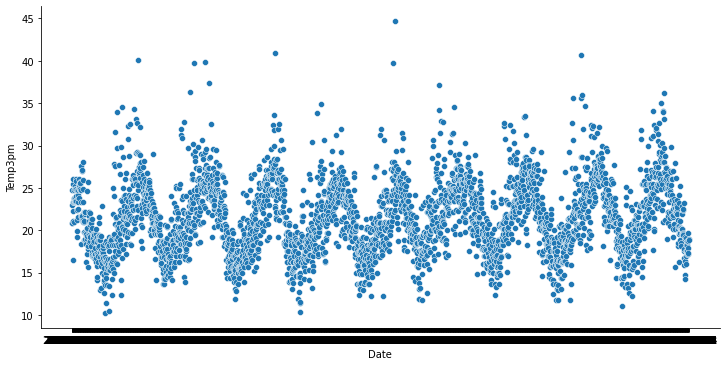

In [31]:
import matplotlib.pyplot as plt
plot_sydney = sns.relplot(x='Date',
                         y= "Temp3pm",
                         data=sydney,
                         aspect = 2)

Plotting the temperatures at 3pm at Austalia making the x-axis the date. Initial goal was to see how temperature has changed over time. In this plot it is difficult to see difinelty show that there are changes. 

## Now a different plot to see how temperatues changed


In [33]:
data_in_sydney=  data[data["Location"]=='Sydney']
data_in_sydney

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33515,2017-06-21,Sydney,8.6,19.6,0.0,2.0,7.8,SSE,37.0,W,...,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,No
33516,2017-06-22,Sydney,9.3,19.2,0.0,2.0,9.2,W,30.0,W,...,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No
33517,2017-06-23,Sydney,9.4,17.7,0.0,2.4,2.7,W,24.0,WNW,...,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No
33518,2017-06-24,Sydney,10.1,19.3,0.0,1.4,9.3,W,43.0,W,...,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,No,No


In [34]:
data_in_sydney['Datetime'] = pd.to_datetime(data_in_sydney['Date']).dt.year
data_in_sydney

<ipython-input-34-4ca01c1881fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_in_sydney['Datetime'] = pd.to_datetime(data_in_sydney['Date']).dt.year


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Datetime
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes,2008
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes,2008
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes,2008
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes,2008
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33515,2017-06-21,Sydney,8.6,19.6,0.0,2.0,7.8,SSE,37.0,W,...,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,No,No,2017
33516,2017-06-22,Sydney,9.3,19.2,0.0,2.0,9.2,W,30.0,W,...,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No,2017
33517,2017-06-23,Sydney,9.4,17.7,0.0,2.4,2.7,W,24.0,WNW,...,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No,2017
33518,2017-06-24,Sydney,10.1,19.3,0.0,1.4,9.3,W,43.0,W,...,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,No,No,2017


In [35]:
data_in_sydney['Month_and_day'] = pd.to_datetime(data_in_sydney['Date']).dt.strftime('%m-%d')


<ipython-input-35-6ef7e7e7e237>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_in_sydney['Month_and_day'] = pd.to_datetime(data_in_sydney['Date']).dt.strftime('%m-%d')


In [36]:
data_in_sydney

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Datetime,Month_and_day
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes,2008,02-01
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes,2008,02-02
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes,2008,02-03
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes,2008,02-04
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes,2008,02-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33515,2017-06-21,Sydney,8.6,19.6,0.0,2.0,7.8,SSE,37.0,W,...,1025.9,1025.3,2.0,2.0,10.5,17.9,No,No,2017,06-21
33516,2017-06-22,Sydney,9.3,19.2,0.0,2.0,9.2,W,30.0,W,...,1028.5,1024.6,2.0,2.0,11.0,18.7,No,No,2017,06-22
33517,2017-06-23,Sydney,9.4,17.7,0.0,2.4,2.7,W,24.0,WNW,...,1020.8,1015.0,6.0,6.0,10.2,17.3,No,No,2017,06-23
33518,2017-06-24,Sydney,10.1,19.3,0.0,1.4,9.3,W,43.0,W,...,1017.3,1015.1,5.0,2.0,12.4,19.0,No,No,2017,06-24


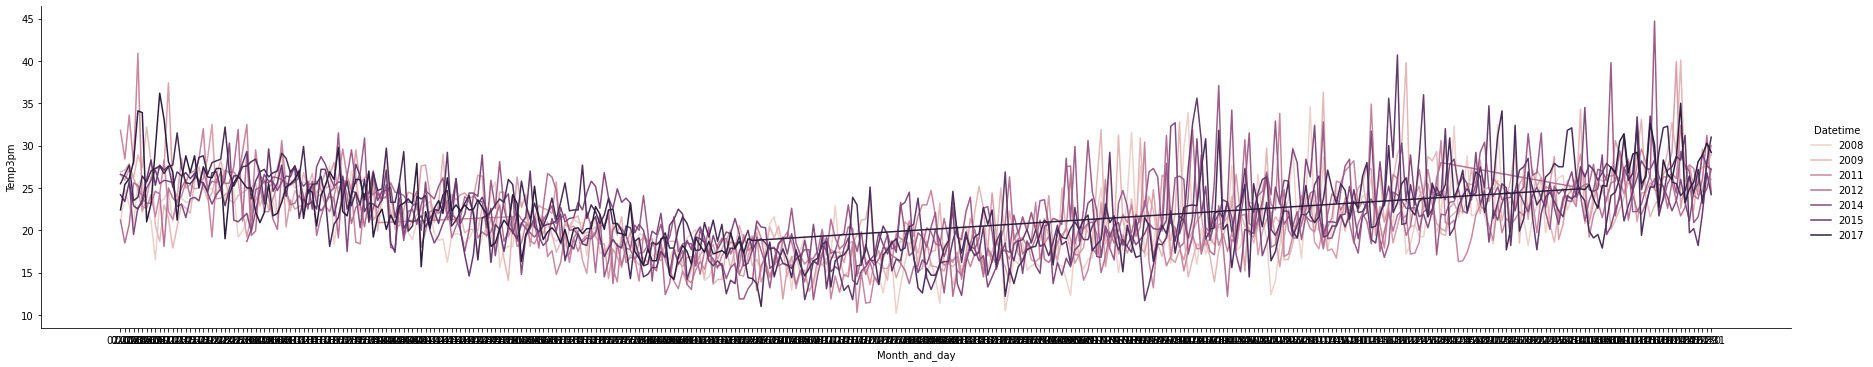

In [64]:
plot_sydney = sns.relplot(x="Month_and_day", 
                          y="Temp3pm", 
                          kind="line", 
                          hue="Datetime",
                          aspect=5,
                          data=data_in_sydney)

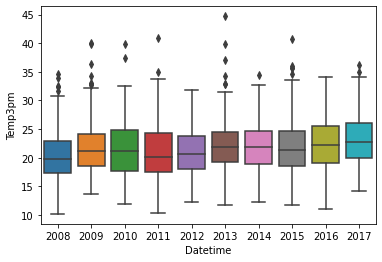

In [65]:
### box plot with temperature at 3pm

Sydney_box = sns.boxplot(x="Datetime", y="Temp3pm", data=data_in_sydney)

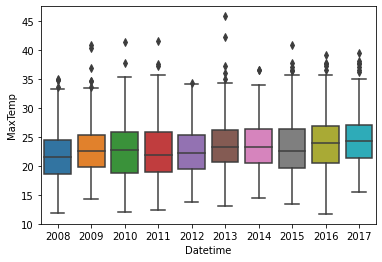

In [39]:
### box plot with max temperatures 
Sydney_max = sns.boxplot(x="Datetime", y="MaxTemp", data=data_in_sydney)

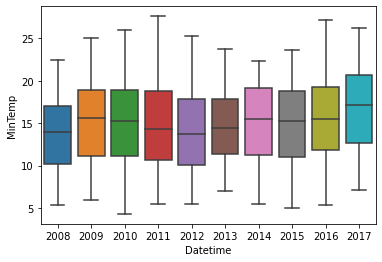

In [40]:
### box plot with min temeperatures 
Sydney_max = sns.boxplot(x="Datetime", y="MinTemp", data=data_in_sydney)

## Observation2 
As we can see from various plots above, it is difficult to simply show temperture increases over time. 
Therefore, a shift in the research question is necessary. We have decided to show climate differences acorss Australia, given the dataset's rich values collected that are separated all over the Australian continent. 

The selected cities are 
1. Carins
2. Brisbane
3. Sydeny
4. Melbourne 
5. Adelaide 
6. Alice Springs 
7. Uluru
8. Perth
9. Darwin



![Australia](https://www.mapsofworld.com/australia/cities/cities-in-australia.jpg)

A map of Australia is also attached to see where the cities are geologically located. 

In [44]:
data_major = (data.loc[data['Location'].isin(['Cairns','Brisbane','Sydney','Melbourne','Adelaide','AliceSprings','Uluru','Perth','Darwin'])])



data_major

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

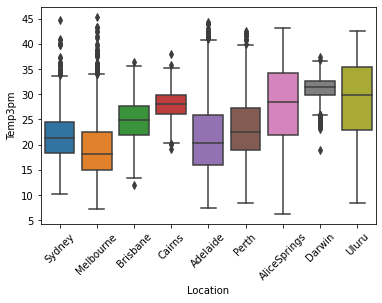

In [58]:
### Temperatue difference Across Australia 

temp_major_box = sns.boxplot(x="Location", y="Temp3pm", data=data_major)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

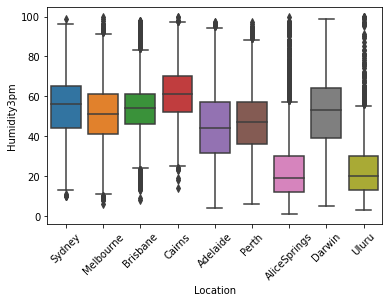

In [59]:
### humidity difference Across Australia 
humidity_major_box = sns.boxplot(x="Location", y="Humidity3pm", data=data_major)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

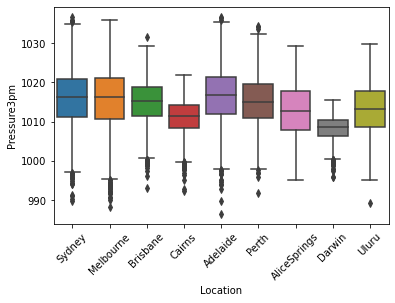

In [60]:
### airpressure difference Across Australia 

pressure_major_box = sns.boxplot(x="Location", y="Pressure3pm", data=data_major)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

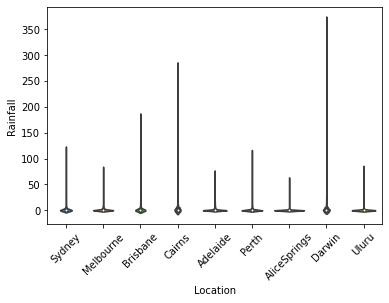

In [61]:

sns.violinplot(x='Location', y="Rainfall", data=data_major)
plt.xticks(rotation = 45)

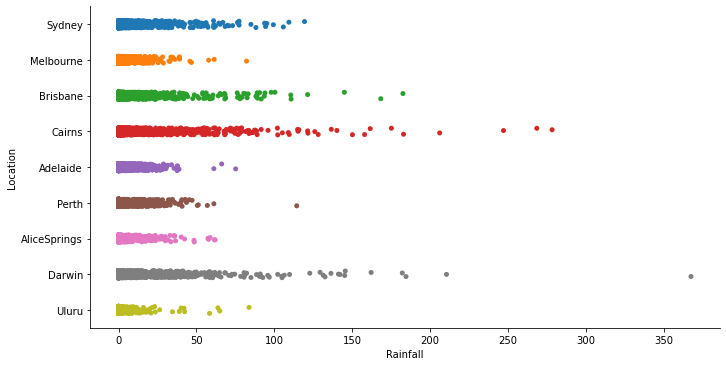

In [68]:
### Showing differences in rainfall across Australia. 
rain_major_box = sns.catplot(x="Rainfall", y="Location", data=data_major, aspect=2)

## Observations
As expected, there are clear climate differences across Australia. 
Both temperature at 3pm, humidity a 3pm, air pressure at 3pm, and rainfall varies across Australia. Differece could be largly due to the fact that cities that are inward of Austalia tend to be drier and those cities across the coast line tend to be more humid. The difference in temperature can also be the difference the latitude of the city. Those who are up north are closer to the equator and those who are down south are further from the equator. 


- Is is in fact true that the average temperature in cities that are up north and those that are inward have higher temperatures. 
- We can also see that the humidity is drastically different in the cities that are inward of Australia. Alice Springs and Uluru, which are located in the middle of Australia are less humid compared to those cities along the coast side. This is mainly due to inland climates. 
- Air pressure seems to be consistent over Australia. Not many dractic differences in averages.  
- Darwin, Caims, Brisbane, and Sydney seem to have more rainfall compared to other locations. Futher analysis can be conducted on the reasons why these cities have more rainfall. As expected the inner locations have small rainfall. Unexpectedly, Adelaide, a location close to the ocean has small percipitation. 
